In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

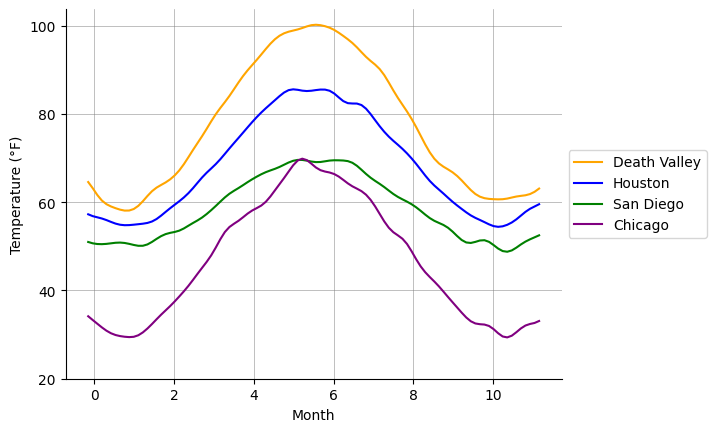

In [2]:
from scipy.ndimage import gaussian_filter1d

_rng = np.random.default_rng(2024_04_28)

x = np.pi + 12 / 8 * np.linspace(-0.7 * np.pi, np.pi + 0.7 * np.pi, 100)

death_valley = 20 * np.sin(8 / 12 * (x - np.pi)) + 80
houston = 15 * np.sin(8 / 12 * (x - np.pi)) + 70
san_diego = 10 * np.sin(8 / 12 * (x - np.pi)) + 60
chicago = 20 * np.sin(8 / 12 * (x - np.pi)) + 50

# Adding scaled down noise
noise_scale = 2  # Scale down the noise
death_valley_noise = _rng.normal(0, noise_scale, size=x.size)
houston_noise = _rng.normal(0, noise_scale, size=x.size)
san_diego_noise = _rng.normal(0, noise_scale, size=x.size)
chicago_noise = _rng.normal(0, noise_scale * 1.5, size=x.size)

# Smoothing the noise
death_valley += gaussian_filter1d(death_valley_noise, sigma=2)
houston += gaussian_filter1d(houston_noise, sigma=2)
san_diego += gaussian_filter1d(san_diego_noise, sigma=2)
chicago += gaussian_filter1d(chicago_noise, sigma=2)


plt.plot(x, death_valley, label = "Death Valley", c = "orange")
plt.plot(x, houston, label = "Houston", c = "blue")
plt.plot(x, san_diego, label ="San Diego", c = "green")
plt.plot(x, chicago, label = "Chicago", c = "purple")

plt.grid(True, which='both', linewidth=0.5, color='grey', alpha=0.7)

plt.ylabel("Temperature (°F)")
plt.xlabel("Month")

plt.yticks(np.arange(20, 110, 20))

plt.gca().spines[["top", "right"]].set_visible(False)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("imgs/2_3.png", bbox_inches="tight", dpi=300)

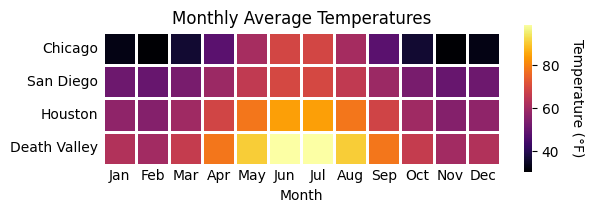

In [3]:
from matplotlib.colorbar import Colorbar
import seaborn as sns

x_integer = np.arange(12)

death_valley_integer = 20 * np.sin(8 / 12 * (x_integer - np.pi)) + 80
houston_integer = 15 * np.sin(8 / 12 * (x_integer - np.pi)) + 70
san_diego_integer = 10 * np.sin(8 / 12 * (x_integer - np.pi)) + 60
chicago_integer = 20 * np.sin(8 / 12 * (x_integer - np.pi)) + 50

# Combine the data into a 2D array
data = np.array([death_valley_integer, houston_integer, san_diego_integer, chicago_integer])

# Create the heatmap without annotations, in square cells with a small line separating them
heatmap = sns.heatmap(data, annot=False, square=True, cmap="inferno", linewidths=2,
            yticklabels=["Death Valley", "Houston", "San Diego", "Chicago"],
            xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
            cbar_kws={"shrink": 0.4})

plt.gca().invert_yaxis()

plt.tick_params(axis="both", which="both", length=0)

cbar = heatmap.collections[0].colorbar
cbar.set_label("Temperature (°F)", rotation=270)
cbar.ax.yaxis.set_label_coords(8, 0.5)

plt.title("Monthly Average Temperatures")
plt.xlabel("Month")
plt.savefig("imgs/2_4.png", bbox_inches="tight", dpi=300)

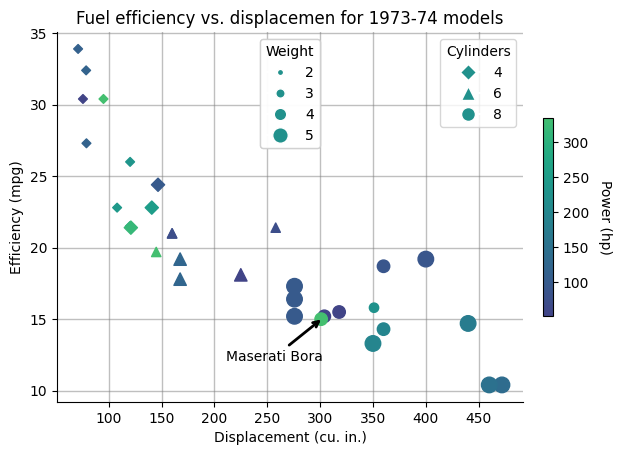

In [4]:
from matplotlib.markers import MarkerStyle
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

data = pd.read_csv("data/motor_trend_1974.csv")

weight_bins = pd.qcut(data.wt, q=4, labels=["2", "3", "4", "5"])
data["weight_bins"] = weight_bins

data["markers"] = data.cyl.map({4: "D", 6: "^", 8: "o"})

cmap = LinearSegmentedColormap.from_list(
    "truncated_viridis", 
    plt.cm.viridis(np.linspace(0.2, 0.7, 256))
)
legend_color = plt.cm.viridis(0.5)

fig, ax = plt.subplots()

for marker in data.markers.unique():
    _temp: pd.DataFrame = data[data.markers == marker]
    ax.scatter(
        x = _temp.disp,
        y = _temp.mpg,
        s = _temp.weight_bins.astype(int)**2 * 5,
        marker = marker,
        c = _temp.hp,
        cmap = cmap,
        zorder = 3
    )

# Special Annotation for the maserati bora as it's uniquely powerful for its displacement
maserati_bora = data.iloc[30]
maserati_point = (maserati_bora.disp + 2, maserati_bora.mpg + 0.1)
ax.annotate('Maserati Bora', xy=maserati_point, xytext=(maserati_point[0], maserati_point[1]-3),
            arrowprops=dict(facecolor='black', arrowstyle='->', lw=2), ha='right')


plt.ylabel("Efficiency (mpg)")
plt.xlabel("Displacement (cu. in.)")

plt.gca().spines[["top", "right"]].set_visible(False)

plt.grid(True, which='both', linewidth=1, color='grey', alpha=0.5, zorder = 0)

legend1_labels = ['4', '6', '8']
legend1_markers = [Line2D([0], [0], marker='D', color='w', label='4',
                          markerfacecolor=legend_color, markersize=8),
                   Line2D([0], [0], marker='^', color='w', label='6',
                          markerfacecolor=legend_color, markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='8',
                          markerfacecolor=legend_color, markersize=10)]
legend1 = ax.legend(handles=legend1_markers, labels=legend1_labels, loc='upper right', title='Cylinders')

ax.add_artist(legend1)

legend2_labels = ['2', '3', '4', '5']
legend2_markers = [Line2D([0], [0], marker='o', color='w', label='2',
                          markerfacecolor=legend_color, markersize=np.sqrt(2**2 * 5)),
                   Line2D([0], [0], marker='o', color='w', label='3',
                          markerfacecolor=legend_color, markersize=np.sqrt(3**2 * 5)),
                   Line2D([0], [0], marker='o', color='w', label='4',
                          markerfacecolor=legend_color, markersize=np.sqrt(4**2 * 5)),
                   Line2D([0], [0], marker='o', color='w', label='5',
                          markerfacecolor=legend_color, markersize=np.sqrt(5**2 * 5))]
legend2 = ax.legend(handles=legend2_markers, labels=legend2_labels, loc='upper center', title='Weight')

ax.add_artist(legend2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(data['hp']), vmax=max(data['hp'])))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Power (hp)', rotation=-90)
cbar.ax.yaxis.set_label_coords(7, 0.5)

plt.title("Fuel efficiency vs. displacemen for 1973-74 models")

plt.savefig("imgs/2_5.png", bbox_inches="tight", dpi=300)

In [5]:
data[(data.disp > 280) & (data.disp < 320)]

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,weight_bins,markers
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,4,o
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2,4,o
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,4,o


In [6]:
data.iloc[30]

Car            Maserati Bora
mpg                     15.0
cyl                        8
disp                   301.0
hp                       335
drat                    3.54
wt                      3.57
qsec                    14.6
vs                         0
am                         1
gear                       5
carb                       8
weight_bins                4
markers                    o
Name: 30, dtype: object